# Collaborative Filtering with NearestNeighbor of sklearn
---  

## Concept
NearestNeighbor of Sklearn is a memory-based colaborative filtering method which predict teh rating based on teh quajntified similarities between the users (user-user) and between items (item-item).

<!-- <img src="nmf.png" width="600" height="400"> -->

## Loading Libraries
***Implementing the sklearn Library to Model a Recommender System***

In [28]:
import pickle

import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.metrics import pairwise
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

## Reading the Tables: Getting the Data Sets

In [15]:
# load_data.py

# first we read our data set from directroy
df_ratings = pd.read_csv('./data/ml-latest-small/ratings_cleaned.csv')
df_movies = pd.read_csv('./data/ml-latest-small/movies_cleaned.csv')
df_links = pd.read_csv('./data/ml-latest-small/links_cleaned.csv')

# here we drop column time_stamp since we may not use it at all till the end of project
# df_rating = df_rating.drop('time_stamp', axis = 1, inplace = False)

In [1]:
# df_rating.movieId.unique(), df_movies.movieId.unique()

## Initialize a sparse user-item rating matrix

In [50]:
# (data, (row_ind, col_ind))
# csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
# where data, row_ind and col_ind satisfy the relationship a[row_ind[k], col_ind[k]] = data[k].

R = csr_matrix((df_rating["rating"], (df_rating["userId"], df_rating["movieId"])))
R.shape

In [51]:
df_r = pd.DataFrame(R.todense())
df_r.shape

(611, 9742)

## Create a model and set the hyperparameters

In [53]:
# Initialize the NearestNeighbors model
model = NearestNeighbors(metric='cosine')

# fit it to the Ratings matrix
model.fit(R)

NearestNeighbors(metric='cosine')

## Save model into a file

In [54]:
with open('./model_neighbors.pkl', 'wb') as file:
    pickle.dump(model, file)

## Load model from the file

In [55]:
with open('./model_neighbors.pkl', 'rb') as file:
    model = pickle.load(file)

## Queries of example new users

In [4]:
# Rating by Shabnam: Movies with action genre
# Shabnam_query_action_genre = {
#     # movieId: rating
#     9:4.5, 
#     20:4.3,
#     376:4.6,
#     466:5,
#     522:5,
#     737:4.8,
#     3555:5,
#     7163:4.2,
#     7325:4.5,
#     8531: 5.0
# }

Shabnam_query_action_genre = {
    # movieId: rating
    9:4.5, 
    71:4.3,
    204:4.6,
    251:5,
    1170:5,
    1497:4.8,
    1599:5,
    2817:4.2,
    3283:4.5,
    3769: 5.0
}

# Rating by Hamid: Movies with comic genress
# hamid_query_comic_genre = {
#     # movieId: rating
#     429:4.5, 
#     492:4.3,
#     708:4.6,
#     973:5,
#     1034:5,
#     1235:4.8,
#     1268:5,
#     1663:4.2,
#     2027:4.5,
#     3048: 5.0
# }

# Rating by Hamid: Movies with only comic genress
hamid_query_comic_genre = {
    # movieId: rating
    5:4.5, 
    18:4.3,
    19:4.6,
    65:5,
    69:5,
    88:4.8,
    102:5,
    104:4.2,
    119:4.5,
    125: 5.0
}

zahra_query_drama_genre = {
    # movieId: rating
    26:4.5, 
    40:4.3,
    43:4.6,
    57:5,
    121:5,
    148:4.8,
    175:5,
    193:4.2,
    209:4.5,
    298: 5.0
}

In [79]:
df_new_user = pd.DataFrame(hamid_query_comic_genre, columns=df_movies["movieId"], index=["new_user"])
df_new_user

movieId,0,1,2,3,4,5,6,7,8,9,...,9732,9733,9734,9735,9736,9737,9738,9739,9740,9741
new_user,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# Fill missing values
df_new_user_filled = df_new_user.fillna(0)
df_new_user_filled

movieId,0,1,2,3,4,5,6,7,8,9,...,9732,9733,9734,9735,9736,9737,9738,9739,9740,9741
new_user,0,0,0,0,0,4.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Calculate the score based on the Trained Model

Searching for n similar users\
Predict the rates for unseen movies based on the existing rating.

## Making a Recommendation List for a Single user using unoptimzed model

In [81]:
# Calculate the distances to all other users in the data!
similarity_scores, neighbor_ids = model.kneighbors(
    df_new_user_filled,
    n_neighbors=5,
    return_distance=True,
)

# sklearn returns a list of predictions
# extract the first and only value of the list
df_neighbors = pd.DataFrame(
    data={
        "neighbor_id": neighbor_ids[0],
        "similarity_score": similarity_scores[0],
    }
)

df_neighbors.sort_values("similarity_score", ascending=False, inplace=True)
df_neighbors

,neighbor_id,similarity_score
4,121,0.919087
3,588,0.916586
2,501,0.915603
1,524,0.914415
0,444,0.914084


## Showing the dataframe for the k users similiar to our new user

In [82]:
neighbor_ids[0]

array([444, 524, 501, 588, 121], dtype=int64)

In [83]:
# Look at ratings for 5 users that are similar
neighborhood = df_r.iloc[neighbor_ids[0]]
print(neighborhood.shape)
neighborhood

(5, 9742)


,0,1,2,3,4,5,6,7,8,9,...,9732,9733,9734,9735,9736,9737,9738,9739,9740,9741
444,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,0.0,3.0,5.0,0.0,3.0,3.0,4.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,4.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Filter out seen movies

In [84]:
neighborhood_filtered = neighborhood.drop(hamid_query_comic_genre.keys(), axis=1)
print(neighborhood_filtered.shape)
neighborhood_filtered

(5, 9732)


,0,1,2,3,4,6,7,8,9,10,...,9732,9733,9734,9735,9736,9737,9738,9739,9740,9741
444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,0.0,3.0,5.0,0.0,3.0,4.0,3.0,0.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Calculate the Ratings for similar users based on similarity scores
This process will generate the new set of ratings based on the similarity with the refrence user (new user)

In [85]:
df_get_score = df_neighbors.set_index("neighbor_id")
print(df_get_score.shape)
df_get_score

(5, 1)


,similarity_score
neighbor_id,
121,0.919087
588,0.916586
501,0.915603
524,0.914415
444,0.914084


In [86]:
# Multiply the ratings with the similarity score of each user and
# calculate the summed up rating for each movie: the summation is over the ratings of the 5 users

df_score = neighborhood_filtered.apply(
    lambda x: df_get_score.loc[x.index]["similarity_score"] * x
)
print(df_score.shape)
df_score

(5, 9732)


,0,1,2,3,4,6,7,8,9,10,...,9732,9733,9734,9735,9736,9737,9738,9739,9740,9741
444,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524,3.657661,0.00000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,3.657661,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,0.000000,2.74681,4.578017,0.0,2.746810,3.662413,2.74681,0.0,3.662413,2.746810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588,0.000000,0.00000,2.749757,0.0,0.000000,0.000000,0.00000,0.0,2.749757,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,3.676348,0.00000,0.000000,0.0,2.757261,0.000000,0.00000,0.0,0.000000,3.676348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Ranking the movies based on the calcualted scores based on quantified similarity 

In [87]:
# doing summation over all 5 users for each movies
df_score_ranked = df_score.sum(axis=0).reset_index().sort_values(0, ascending=False)
print(df_score_ranked.shape)
df_score_ranked.columns = ["movieId", "score"]
df_score_ranked.reset_index(drop=True, inplace=True)
df_score_ranked.head(5)

(9732, 2)


,movieId,score
0,15,14.664924
1,97,14.658858
2,277,13.749115
3,43,13.735431
4,46,13.728989


In [88]:
recommendations = df_movies[df_movies["movieId"].isin(df_score_ranked.iloc[:10]["movieId"])]
recommendations[["movieId", "title", 'genres']]

,movieId,title,genres
15,15,Casino,"['Crime', 'Drama']"
20,20,Get Shorty,"['Comedy', 'Crime', 'Thriller']"
43,43,Seven (a.k.a. Se7en),"['Mystery', 'Thriller']"
46,46,"Usual Suspects, The","['Crime', 'Mystery', 'Thriller']"
97,97,Braveheart,"['Action', 'Drama', 'War']"
257,257,Pulp Fiction,"['Comedy', 'Crime', 'Drama', 'Thriller']"
277,277,"Shawshank Redemption, The","['Crime', 'Drama']"
337,337,True Lies,"['Action', 'Adventure', 'Comedy', 'Romance', '..."
398,398,"Fugitive, The",['Thriller']
510,510,"Silence of the Lambs, The","['Crime', 'Horror', 'Thriller']"


## Getting the Poster of Movies

To get movie posters using the TMDB (The Movie Database) ID in Python, we use requests library.\
TMDB provides an API that can be accessed to get movie details, including poster URLs.

***Explanation***\
***base_url***: The endpoint to get movie details by ID.\
***poster_path***: The path to the poster image is provided in the API response.\
***Poster URL***: Use https://image.tmdb.org/t/p/w500 as the base URL, followed by the poster_path to get a medium-sized image. You can replace w500 with other sizes (w200, w780, etc.) as needed.

In [104]:
import requests
from PIL import Image
from io import BytesIO
import os

def get_movie_posters(movie_tmbds, api_key, save_directory='./images'):
    """
    Function to get movie posters' URLs and save the images locally.
    
    Parameters:
    - movie_tmbds: list of int, a list of TMDB movie IDs.
    - api_key: str, TMDB API key.
    - save_directory: str, path to the directory where images will be saved (default is './images').

    Returns:
    - list_poster_url: list of str, list of poster URLs.
    """
    # Ensure the directory for saving images exists
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)

    image_paths = []
    
    for movie_tmbd in movie_tmbds:
        print(f"Fetching poster for movie ID: {movie_tmbd}")
        base_url = f'https://api.themoviedb.org/3/movie/{movie_tmbd}'

        # Send a GET request to TMDB API
        response = requests.get(base_url, params={'api_key': api_key})

        # Check if the request was successful
        if response.status_code == 200:
            data = response.json()
            poster_path = data.get('poster_path')
            if poster_path:
                poster_url = f'https://image.tmdb.org/t/p/w500{poster_path}'
                # list_poster_url.append(poster_url)
                
                # Send a GET request to the image URL
                response_image = requests.get(poster_url)
                image = Image.open(BytesIO(response_image.content))
                
                # Save the image locally
                image_path = os.path.join(save_directory, f"poster_tmbd_{movie_tmbd}.jpg")
                image.save(image_path)
                image_paths.append(image_path)
                print(f"Saved poster for movie ID {movie_tmbd} at {image_path}")
            else:
                print(f"Poster not found for movie ID {movie_tmbd}.")
        else:
            print(f"Failed to fetch movie details for ID {movie_tmbd}. Status code: {response.status_code}")
    
    return image_paths

In [92]:
df_links.head()

,Unnamed: 0,movieId,imdbId,tmdbId
0,0,0,114709,862.0
1,1,1,113497,8844.0
2,2,2,113228,15602.0
3,3,3,114885,31357.0
4,4,4,113041,11862.0


In [93]:
# getting the poster images and saving them in a directory 
api_key = '32963fd453f575aa44262db989d926d6'
image_paths = get_movie_posters(df_links.tmdbId.loc[recommendations.movieId], api_key)

image_paths

Fetching poster for movie ID: 524.0
Saved poster for movie ID 524.0 at ./images\poster_tmbd_524.0.jpg
Fetching poster for movie ID: 8012.0
Saved poster for movie ID 8012.0 at ./images\poster_tmbd_8012.0.jpg
Fetching poster for movie ID: 807.0
Saved poster for movie ID 807.0 at ./images\poster_tmbd_807.0.jpg
Fetching poster for movie ID: 629.0
Saved poster for movie ID 629.0 at ./images\poster_tmbd_629.0.jpg
Fetching poster for movie ID: 197.0
Saved poster for movie ID 197.0 at ./images\poster_tmbd_197.0.jpg
Fetching poster for movie ID: 680.0
Saved poster for movie ID 680.0 at ./images\poster_tmbd_680.0.jpg
Fetching poster for movie ID: 278.0
Saved poster for movie ID 278.0 at ./images\poster_tmbd_278.0.jpg
Fetching poster for movie ID: 36955.0
Saved poster for movie ID 36955.0 at ./images\poster_tmbd_36955.0.jpg
Fetching poster for movie ID: 5503.0
Saved poster for movie ID 5503.0 at ./images\poster_tmbd_5503.0.jpg
Fetching poster for movie ID: 274.0
Saved poster for movie ID 274.0 at

['./images\\poster_tmbd_524.0.jpg',
 './images\\poster_tmbd_8012.0.jpg',
 './images\\poster_tmbd_807.0.jpg',
 './images\\poster_tmbd_629.0.jpg',
 './images\\poster_tmbd_197.0.jpg',
 './images\\poster_tmbd_680.0.jpg',
 './images\\poster_tmbd_278.0.jpg',
 './images\\poster_tmbd_36955.0.jpg',
 './images\\poster_tmbd_5503.0.jpg',
 './images\\poster_tmbd_274.0.jpg']

## Merging the Posters of Movies

### Explanation:
***Image.new('RGB', (width, height))***: Creates a new blank image with specified dimensions.\
***paste(img, (x_offset, y_offset))***: Pastes each image at the specified offset.\
Offsets: Used to track where each image should be pasted in the merged image.
### Customization:
You can customize the background color of the new image by passing an additional color parameter, e.g., Image.new('RGB', (width, height), (255, 255, 255)) for a white background.\
Adjust the image_paths to include the paths to the images you want to merge.
This code merges images either horizontally or vertically and saves the merged result to your current working directory.

In [96]:
def image_merger(image_paths, show_type):
    """ It gets in paths of images and merge the images vertically (ver) or horizontally (hor)"""
    # image_paths is a list of paths of images
    # show_type is direction to show the merge image

    # Open images and store them in a list
    images = [Image.open(img_path) for img_path in image_paths]

    # Determine the width and height for the final merged image
    # For horizontal merge
    # calculating the total width width and maximum hight of all images
    total_width = sum(img.width for img in images)
    max_height = max(img.height for img in images)

    # For vertical merge
    # calculating the total hights width and maximum wdith of all images
    total_height = sum(img.height for img in images)
    max_width = max(img.width for img in images)

    # Create a new blank image for horizontal merge
    merged_image_horizontal = Image.new('RGB', (total_width, max_height))

    # Create a new blank image for vertical merge
    merged_image_vertical = Image.new('RGB', (max_width, total_height))

    # Paste images side by side for horizontal merge
    x_offset = 0
    for img in images:
        merged_image_horizontal.paste(img, (x_offset, 0))
        x_offset += img.width

    # Paste images on top of each other for vertical merge
    y_offset = 0
    for img in images:
        merged_image_vertical.paste(img, (0, y_offset))
        y_offset += img.height

# Save the merged images
    merged_image_horizontal.save('./images/merged_image_horizontal.jpg')
    merged_image_vertical.save('./images/merged_image_vertical.jpg')
    
    if show_type == 'hor':
        return merged_image_horizontal.show()
    else:
        return merged_image_vertical.show()


In [97]:
image_merger(image_paths, 'hor')

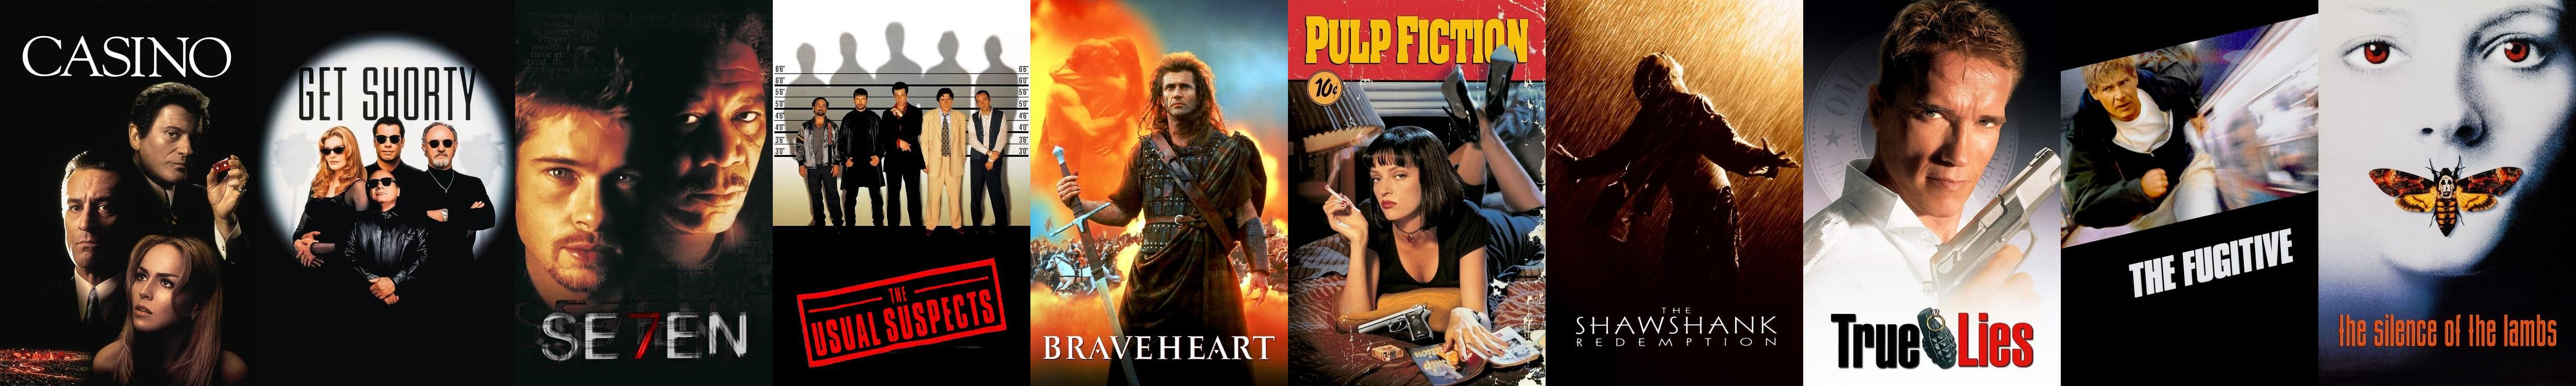

In [98]:
from IPython.display import Image
Image(filename='./images/merged_image_horizontal.jpg')

## Defining a function for the whole process

In [109]:
def recommender_nearest_neghibor(query, model, df_ratings, df_movies, df_links, k=5):
    """ This function takes the query of new user and model trained and generates the poster of 
        recommended movies
        query: the rating info of the new user that is to be obtained in th stremlit app
        model: a pretarined model saved in the model directory of the main repo
        df_ratings: the table on the available ratings 
        df_movies: the table on the movies
        df_links: the table contaiing the tmbdIds with which we get the posters of movies
        k: number of recommended movies"""
    # making a datafrom from the query of new user

    df_new_user = pd.DataFrame(query, columns=df_movies["movieId"], index=["new_user"])
   
    df_new_user_filled = df_new_user.fillna(0)

    # Calculate the distances to all other users in the data!
    similarity_scores, neighbor_ids = model.kneighbors(
        df_new_user_filled,
        n_neighbors=5,
        return_distance=True,)

    # sklearn returns a list of predictions
    # extract the first and only value of the list
    df_neighbors = pd.DataFrame(
        data={
            "neighbor_id": neighbor_ids[0],
            "similarity_score": similarity_scores[0],
        }
    )

    df_neighbors.sort_values("similarity_score", ascending=False, inplace=True)

    # Look at ratings for 5 users that are similar
    neighborhood = df_r.iloc[neighbor_ids[0]]

    # Filter out seen movies
    neighborhood_filtered = neighborhood.drop(query.keys(), axis=1)

    # Calculate the Ratings for similar users based on similarity scores
    # This process will generate the new set of ratings based on the similarity with the refrence user (new user)
    df_get_score = df_neighbors.set_index("neighbor_id")

    # Multiply the ratings with the similarity score of each user and
    # calculate the summed up rating for each movie

    df_score = neighborhood_filtered.apply(
        lambda x: df_get_score.loc[x.index]["similarity_score"] * x
    )

    # Ranking teh movies based on the calcualted scores based on quantified similarity
    df_score_ranked = df_score.sum(axis=0).reset_index().sort_values(0, ascending=False)
    df_score_ranked.columns = ["movieId", "score"]
    df_score_ranked.reset_index(drop=True, inplace=True)

    # making a dataframe for recommendations
    recommendations = df_movies[df_movies["movieId"].isin(df_score_ranked.iloc[:10]["movieId"])]


    # getting the poster images and saving them in a directory 
    api_key = '32963fd453f575aa44262db989d926d6'
    image_paths = get_movie_posters(df_links.tmdbId.loc[recommendations.movieId], api_key)

    return recommendations, image_merger(image_paths, 'hor')


In [3]:
from scripts.recommenderlib import *

In [17]:
model_name = 'NearestNeighbor'

In [18]:
recommender_nearest_neghibor(zahra_query_drama_genre, model_name, df_ratings, df_movies, df_links, k=5)

(     Unnamed: 0  movieId                  title   
 55           55       55    Mr. Holland's Opus   \
 97           97       97            Braveheart    
 126         126      126        Batman Forever    
 134         134      134          Crimson Tide    
 512         512      512  Beauty and the Beast    
 
                                                 genres  released_yr  
 55                                           ['Drama']       1995.0  
 97                          ['Action', 'Drama', 'War']       1995.0  
 126         ['Action', 'Adventure', 'Comedy', 'Crime']       1995.0  
 134                       ['Drama', 'Thriller', 'War']       1995.0  
 512  ['Animation', 'Children', 'Fantasy', 'Musical'...       1991.0  ,
 ['./images\\poster_tmbd_2054.0.jpg',
  './images\\poster_tmbd_197.0.jpg',
  './images\\poster_tmbd_414.0.jpg',
  './images\\poster_tmbd_8963.0.jpg',
  './images\\poster_tmbd_10020.0.jpg'])